In [26]:
import create_CL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pymatgen.core.composition import Composition
import itertools
from matplotlib.ticker import FormatStrFormatter
from labellines import labelLine, labelLines
import json
import statistics
import matplotlib.colors as mcolors
from scipy.stats import linregress

<h3>Make sulfide redox pairs for further analysis</h3>

In [10]:
for number in ['one', 'two']:
    df = pd.read_csv(f'{number}_metal_sulfides_MP_database.csv')
    df.rename(columns={'Unnamed: 0': 'MP_id'}, inplace=True)

    if number == 'one':
        one_metal_reactions = create_CL.process_compositions(df, function_type='one_metal')
        print(f'''
        Number of all one metal sulfides = {len(df)}
        Number of one metal sulfides pairs = {len(one_metal_reactions)}
        ''')
    elif number == 'two':
        two_metal_reactions = create_CL.process_compositions(df, function_type='two_metal')

        print(f'''
        Number of all two metals sulfides = {len(df)}
        Number of two metals sulfides pairs = {len(two_metal_reactions)}
        ''')




        Number of all one metal sulfides = 230
        Number of one metal sulfides pairs = 423
        

        Number of all two metals sulfides = 1771
        Number of two metals sulfides pairs = 99
        


In [11]:
def make_json(dictionary, filename):
    json_output = json.dumps(dictionary, indent=4)
    
    with open(f'{filename}.json', 'w') as f:
        f.write(json_output)

make_json(one_metal_reactions, 'one_metal_data')
make_json(two_metal_reactions, 'two_metal_data')

Getting Gibbs formation energy diagram for all possible pairs of materials

In [12]:
temp_list = np.array(range(400, 1300, 100))
def df_for_Gf_picture(dictionary):
    material_pairs = []
    Hf_0_1_mat = []
    Hf_0_2_mat = []
    Gf_600_1_mat = []
    Gf_600_2_mat = []
    Gf_1200_1_mat = []
    Gf_1200_2_mat = []
    for material_pair, values in dictionary.items():
        material_pairs.append(material_pair)
        Hf_0_1_mat.append(values['Hf_0K, eV/atom'][0])
        Hf_0_2_mat.append(values['Hf_0K, eV/atom'][1])
        Gf_600_1_mat.append(values['Gf_materials, eV/atom'][0][2])
        Gf_600_2_mat.append(values['Gf_materials, eV/atom'][1][2])
        Gf_1200_1_mat.append(values['Gf_materials, eV/atom'][0][8])
        Gf_1200_2_mat.append(values['Gf_materials, eV/atom'][1][8])
    df = pd.DataFrame({
        'material_pair': material_pairs,
        'Hf_0_1_mat': Hf_0_1_mat,
        'Hf_0_2_mat': Hf_0_2_mat,
        'Gf_600_1_mat': Gf_600_1_mat,
        'Gf_600_2_mat': Gf_600_2_mat,
        'Gf_1200_1_mat' : Gf_1200_1_mat,
        'Gf_1200_2_mat' : Gf_1200_2_mat
        })  
    
    return df
df_one = df_for_Gf_picture(one_metal_reactions)
df_two = df_for_Gf_picture(two_metal_reactions)

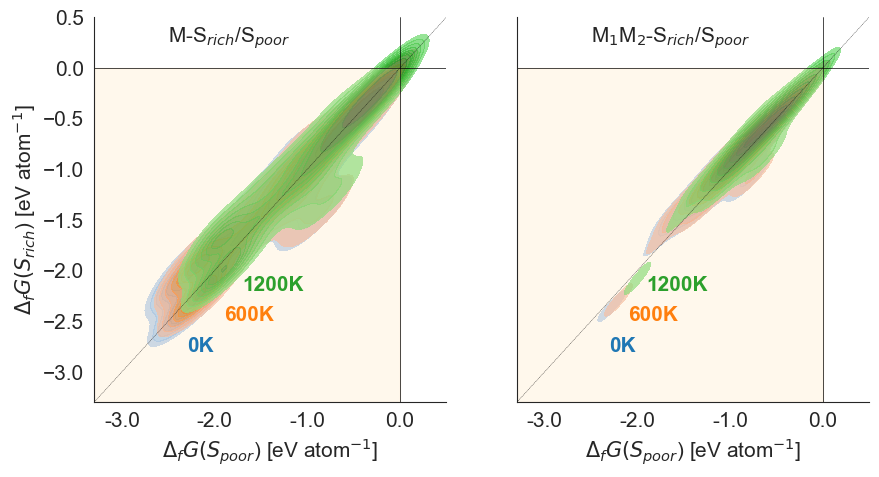

In [13]:
fig, axs = plt.subplots(1,2,figsize=(10,5), sharey=True)
for x, df in zip([1,2], [df_one, df_two]):
    ax = plt.subplot(1,2,x)
    sns.set_style("white")
    sns.kdeplot(
        data=df, x="Hf_0_1_mat", y="Hf_0_2_mat", 
        fill=True,
        thresh=.2,
        alpha=0.7,
    )
    sns.kdeplot(
        data=df, x="Gf_600_1_mat", y="Gf_600_2_mat", 
        fill=True,
        alpha=0.7,
        thresh=.2
    )
    sns.kdeplot(
        data=df, x="Gf_1200_1_mat", y="Gf_1200_2_mat", 
        fill=True,
        alpha=0.7,
        thresh=.2
    )
    xlim, ylim = -3.3, -3.3    
    ax.set_ylim(ylim, 0.5)
    ax.set_xlim(xlim, 0.5)
    plt.fill_betweenx([xlim, 0], ylim, 0, color='moccasin', alpha=0.25, zorder=1)
    ax.axline((0, 0), (1, 1), linewidth=0.25, color='black', linestyle='--')
    ax.axvline(0, color='black', linestyle='-', linewidth=0.5) 
    ax.axhline(0, color='black', linestyle='-', linewidth=0.5) 
    ax.tick_params(axis='both', which='major', labelsize=15)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if x == 1:
        plt.text(-2.5, 0.25, r'M-S$_\mathrm{\mathit{rich}}$/S$_\mathrm{\mathit{poor}}$', fontsize=15)
        plt.text(-2.3, -2.8, f'0K', fontsize=15, color='C0', fontweight='bold')
        plt.text(-1.9, -2.5, f'600K', fontsize=15, color='C1', fontweight='bold')
        plt.text(-1.7, -2.2, f'1200K', fontsize=15, color='C2', fontweight='bold')
    else:
        plt.text(-2.5, 0.25, r'M$_1$M$_2$-S$_\mathrm{\mathit{rich}}$/S$_\mathrm{\mathit{poor}}$', fontsize=15)
        plt.text(-2.3, -2.8, f'0K', fontsize=15, color='C0', fontweight='bold')
        plt.text(-2.1, -2.5, f'600K', fontsize=15, color='C1', fontweight='bold')
        plt.text(-1.9, -2.2, f'1200K', fontsize=15, color='C2', fontweight='bold')

    plt.xlabel(r'${\Delta}\it_fG (S_\mathrm{\mathit{poor}}$) [eV atom$^{-1}$]',fontsize=15)
    plt.ylabel(r'${\Delta}\it_fG (S_\mathrm{\mathit{rich}}$) [eV atom$^{-1}$]',fontsize=15)    

    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.show()

<h3>Get Gibbs reaction energy plots for each pair</h3>

/Users/tolstop/anaconda3/lib/python3.10/site-packages/labellines/core.py:151: UserWarning: Tried to label line Line2D(_child0), but could not find a label for it.
  warnings.warn(
/Users/tolstop/anaconda3/lib/python3.10/site-packages/labellines/core.py:151: UserWarning: Tried to label line Line2D(_child1), but could not find a label for it.
  warnings.warn(
/Users/tolstop/anaconda3/lib/python3.10/site-packages/labellines/core.py:151: UserWarning: Tried to label line Line2D(_child2), but could not find a label for it.
  warnings.warn(
/Users/tolstop/anaconda3/lib/python3.10/site-packages/labellines/core.py:151: UserWarning: Tried to label line Line2D(_child3), but could not find a label for it.
  warnings.warn(
/Users/tolstop/anaconda3/lib/python3.10/site-packages/labellines/core.py:151: UserWarning: Tried to label line Line2D(_child4), but could not find a label for it.
  warnings.warn(
/Users/tolstop/anaconda3/lib/python3.10/site-packages/labellines/core.py:151: UserWarning: Tried to 

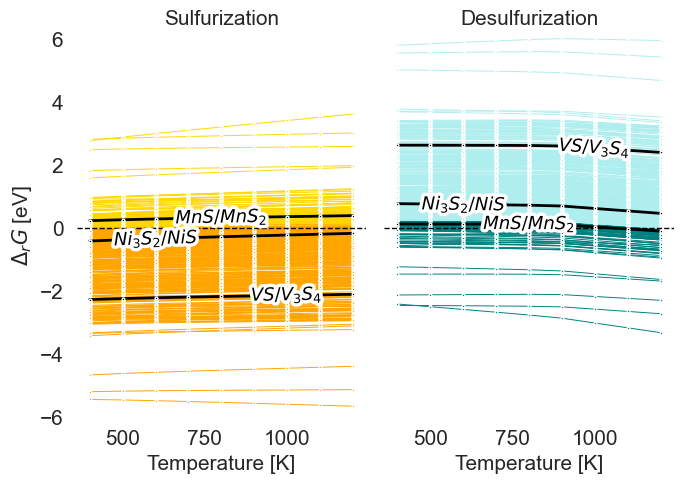

In [28]:
color_palette = [['orange', 'gold'],['teal','paleturquoise']]
       
fig, axs = plt.subplots(1,2,figsize=(7,5), sharey=True)
for x, colors in zip([1,2], color_palette):
    ax = plt.subplot(1,2,x)
    for material_pair in one_metal_reactions.keys():
        dG = one_metal_reactions[material_pair]['Gr_energy, eV'][x-1]

        if any(map(lambda x: x < 0, dG)):
            plt.plot(temp_list, dG, 'o-', 
                 linewidth=0.7, 
    #                  label=label,
                 markersize=2, markeredgecolor='w', markeredgewidth=1, color=colors[0], zorder=1) 

        else:
            plt.plot(temp_list, dG, 'o-', 
                 linewidth=0.7, 
                 markersize=2, markeredgecolor='w', markeredgewidth=1, color=colors[1], zorder=2)    
        if (material_pair == 'MnS/MnS2') | (material_pair == 'VS/V3S4') | (material_pair == 'Ni3S2/NiS'):
            label = f"${material_pair.replace('3', '_3').replace('2', '_2').replace('4', '_4')}$"
            ax.plot(temp_list, dG, 'o-', 
                 linewidth=2, 
                 markersize=2, markeredgecolor='w', markeredgewidth=1, color='black', zorder=3,
                    label=label
                   )  
    plt.axhline(0, color='black', linestyle='--', linewidth=1) 
    ax.set_xlabel('Temperature [K]', fontsize=15)
    ax.set_ylim(-6,6.2)
    ax.tick_params(labelsize=15)
    plt.box(False)

    if x == 1:
        plt.title('Sulfurization', fontsize=15)    
        plt.ylabel(r'$\it{\Delta}_r G$ [eV]', fontsize=15)            

    else: 
        plt.title('Desulfurization', fontsize=15)

    labelLines(plt.gca().get_lines(), zorder=3, fontsize=13)#put labels on lines
fig.tight_layout()
plt.show()


/Users/tolstop/anaconda3/lib/python3.10/site-packages/labellines/core.py:151: UserWarning: Tried to label line Line2D(_child47), but could not find a label for it.
  warnings.warn(
/Users/tolstop/anaconda3/lib/python3.10/site-packages/labellines/core.py:151: UserWarning: Tried to label line Line2D(_child72), but could not find a label for it.
  warnings.warn(
/Users/tolstop/anaconda3/lib/python3.10/site-packages/labellines/core.py:151: UserWarning: Tried to label line Line2D(_child138), but could not find a label for it.
  warnings.warn(


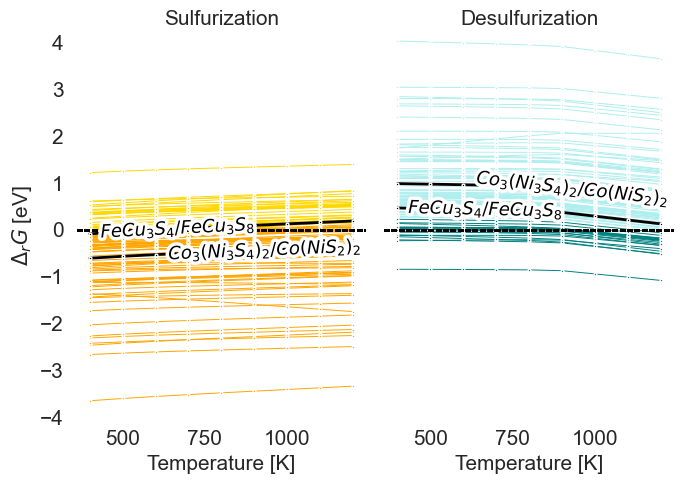

In [29]:
color_palette = [['orange', 'gold'],['teal','paleturquoise']]

fig, axs = plt.subplots(1,2,figsize=(7,5), sharey=True)
for x, colors in zip([1,2], color_palette):
    ax = plt.subplot(1,2,x)
    for material_pair in two_metal_reactions.keys():
        dG = two_metal_reactions[material_pair]['Gr_energy, eV'][x-1]
        if any(map(lambda x: x < 0, dG)):
            plt.plot(temp_list, dG, 'o-',
                  color=colors[0], linewidth=0.7, markersize=2, markeredgecolor='w', markeredgewidth=1, zorder=1) 

        else:
            plt.plot(temp_list, dG, 'o-',
                  color=colors[1], linewidth=0.7, markersize=2, markeredgecolor='w', markeredgewidth=1, zorder=1)    

        if (material_pair == 'Co3(Ni3S4)2/Co(NiS2)2') | (material_pair == 'FeCu3S4/FeCu3S8') :
            label = f"${material_pair.replace('2', '_2').replace('3', '_3').replace('8', '_8').replace('4', '_4').replace('9', '_9')}$"
            ax.plot(temp_list, dG, 'o-', 
                 linewidth=2, 
                 markersize=2, markeredgecolor='w', markeredgewidth=1, color='black', zorder=2,
                    label=label)  
        plt.axhline(0, color='black', linestyle='--', linewidth=1) 
        if x == 1:
            plt.title('Sulfurization', fontsize=15)        
            ax.set_ylabel(r'$\it{\Delta}_r G$ [eV]', fontsize=15)

        else: 
            plt.title('Desulfurization', fontsize=15)
            
        ax.set_xlabel('Temperature [K]', fontsize=15)
        plt.box(False)
        ax.tick_params(labelsize=15)
        ax.set_ylim(-4, 4.2)
    labelLines(plt.gca().get_lines(), zorder=3, fontsize=13)#put labels on lines


fig.tight_layout()
plt.show()

Plot mean values of Gr energy for each group of metals

In [17]:
#Functions for monometallic pairs, identify group of a metal which form a pair
def get_metal_type(composition_str):
    composition_str = composition_str.split('/')[0] 
    elements = Composition(composition_str).elements
    for element in elements:
        if element.symbol == 'S':
            continue  # Skip 'S'
        elif element.symbol in TM_3d:
            metal_type = '3d Transition Metals'
        elif element.symbol in TM_4d:
            metal_type = '4d Transition Metals'
        elif element.symbol in TM_5d:
            metal_type = '5d Transition Metals'
        elif element.is_alkali or element.is_alkaline or element.is_metalloid:
            metal_type = 'Alkali/Alkaline/Metalloid-s'
        elif element.is_post_transition_metal:
            metal_type = 'Post Transition Metals'
        elif element.is_lanthanoid:
            metal_type = 'Lanthanoids'
    return metal_type

#Calculate mean values and standard error for each Gr(T) for each group of metal for each step of CL
def get_Gr_for_metal_type(reaction_dictionary):
    metal_types = [
                    '3d Transition Metals',
        '4d Transition Metals',
        '5d Transition Metals',
        'Alkali/Alkaline/Metalloid-s',
                   'Post Transition Metals', 
                   'Lanthanoids']
    
    gr_energy_lists_I = {metal_type: [[] for _ in range(len(temp_list))] for metal_type in metal_types}
    gr_energy_lists_II = {metal_type: [[] for _ in range(len(temp_list))] for metal_type in metal_types}
    for material_pair, values in reaction_dictionary.items():    
        metal_type = get_metal_type(material_pair)
        for j in range(len(temp_list)):
            gr_energy_lists_I[metal_type][j].append(reaction_dictionary[material_pair]['Gr_energy, eV'][0][j])
            gr_energy_lists_II[metal_type][j].append(reaction_dictionary[material_pair]['Gr_energy, eV'][1][j])

    gr_energy_means_I = {metal_type: [(sum(value < 0 for value in lst) / len(lst)) * 100
                         for lst in gr_energy_lists_I[metal_type]] for metal_type in metal_types}
    gr_energy_means_II = {metal_type: [(sum(value < 0 for value in lst) / len(lst)) * 100
                         for lst in gr_energy_lists_II[metal_type]] for metal_type in metal_types}
    gr_energy_means_I = {metal_type: [np.mean(lst) for lst in gr_energy_lists_I[metal_type]] for metal_type in metal_types}
    gr_energy_stderr_I = {metal_type: [statistics.stdev(lst) for lst in gr_energy_lists_I[metal_type]] for metal_type in metal_types}
    
    gr_energy_means_II = {metal_type: [np.mean(lst) for lst in gr_energy_lists_II[metal_type]] for metal_type in metal_types}
    gr_energy_stderr_II = {metal_type: [statistics.stdev(lst) for lst in gr_energy_lists_II[metal_type]] for metal_type in metal_types}
    return gr_energy_means_I, gr_energy_stderr_I, gr_energy_means_II, gr_energy_stderr_II

#same for bimetallic pairs
def get_mean_Gr_two_metals(reaction_dictionary):
    gr_energy_lists = {step: [[]for _ in range(len(temp_list))] for step in ['I step', 'II step']}
    for material_pair in reaction_dictionary.keys():
        for j in range(len(temp_list)):
            gr_energy_lists['I step'][j].append(reaction_dictionary[material_pair]['Gr_energy, eV'][0][j])
            gr_energy_lists['II step'][j].append(reaction_dictionary[material_pair]['Gr_energy, eV'][1][j])
    gr_energy_means = {step: [np.mean(lst) for lst in gr_energy_lists[step]] for step in ['I step', 'II step']}
    gr_energy_stderr = {step: [statistics.stdev(lst) for lst in gr_energy_lists[step]] for step in ['I step', 'II step']}
      
    return gr_energy_means,gr_energy_stderr

data_I_step_means, data_I_step_stderr, data_II_step_means, data_II_step_stderr = get_Gr_for_metal_type(one_metal_reactions)
data_two_means, data_two_err = get_mean_Gr_two_metals(two_metal_reactions)

/Users/tolstop/anaconda3/lib/python3.10/site-packages/labellines/core.py:151: UserWarning: Tried to label line Line2D(_child28), but could not find a label for it.
  warnings.warn(


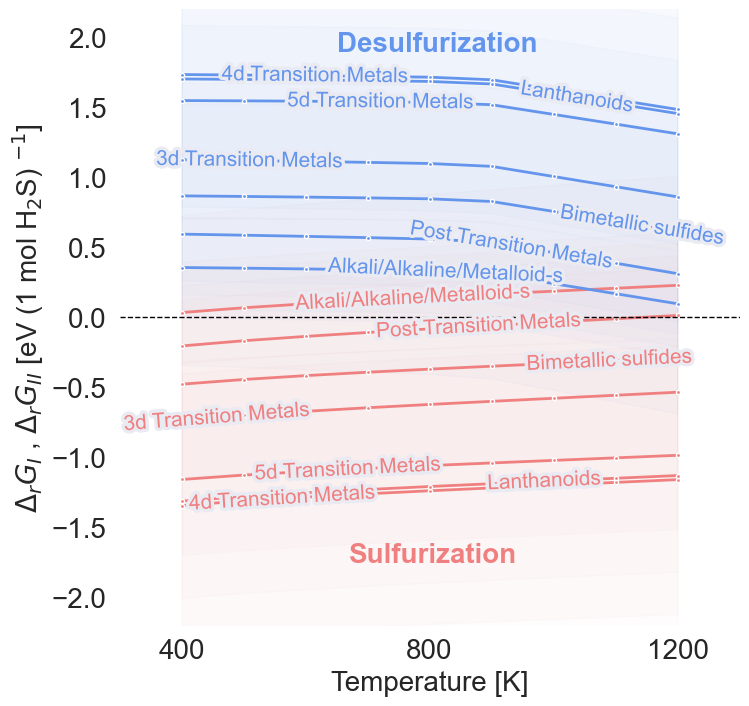

In [19]:
metal_types = list(data_I_step_means.keys())
plt.figure(figsize=(8, 8))  
for metal_type in metal_types:
    data_I_step_means[metal_type] = np.array(data_I_step_means[metal_type])
    data_II_step_means[metal_type] = np.array(data_II_step_means[metal_type])
    data_I_step_stderr[metal_type] = np.array(data_I_step_stderr[metal_type])
    data_II_step_stderr[metal_type] = np.array(data_II_step_stderr[metal_type])
for step in ['I step', 'II step']:
    data_two_means[step] = np.array(data_two_means[step])
    data_two_err[step] = np.array(data_two_err[step])

for metal_type in metal_types:
    plt.plot(temp_list, data_I_step_means[metal_type], label=f'{metal_type}', color='lightcoral',
             linestyle='-',  
             linewidth=2,    
             marker='o',     
             markersize=3,   
             markeredgecolor='w',  
             markeredgewidth=1
            )
    plt.plot(temp_list, data_II_step_means[metal_type], label=f'{metal_type}', color='cornflowerblue',
             linestyle='-',  
             linewidth=2,   
             marker='o',     
             markersize=3,   
             markeredgecolor='w',  
             markeredgewidth=1
            )

    plt.fill_between(temp_list,
                     data_I_step_means[metal_type] - data_I_step_stderr[metal_type],
                     data_I_step_means[metal_type] + data_I_step_stderr[metal_type],
                     color='lightcoral', alpha=0.025)
    plt.fill_between(temp_list,
                     data_II_step_means[metal_type] - data_II_step_stderr[metal_type],
                     data_II_step_means[metal_type] + data_II_step_stderr[metal_type],
                     color='cornflowerblue', alpha=0.025)
for step, color in zip(['I step', 'II step'], ['lightcoral', 'cornflowerblue']):
    plt.plot(temp_list, data_two_means[step], label=f'Bimetallic sulfides', color=color,
             linestyle='-',  
             linewidth=2,    
             marker='o',     
             markersize=3,   
             markeredgecolor='w', 
             markeredgewidth=1
            )
    plt.fill_between(temp_list,
                     data_two_means[step] - data_two_err[step],
                     data_two_means[step] + data_two_err[step],
                     color=color, alpha=0.025)

plt.axhline(0, color='black', linestyle='--', linewidth=1) 
labelLines(plt.gca().get_lines(), zorder=3, fontsize=15)#put labels on lines
plt.xlabel('Temperature [K]', fontsize=20)
plt.ylabel(r'${\Delta}\it_rG _I$ , ${\Delta}\it_rG _{II}$ [eV (1 mol H$_2$S) $^{-1}$]', fontsize=20)
plt.text(650, 1.9, 'Desulfurization', color='cornflowerblue', fontsize=20, fontweight='bold')
plt.text(670, -1.75, 'Sulfurization', color='lightcoral', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)

plt.grid(False)
plt.xlim(300, 1300)
plt.ylim(-2.2, 2.2)

plt.box(False)
plt.xticks([400, 800, 1200])
plt.show()

/var/folders/66/8zx0tncn3gs_xhq4jl2nn7lrrs3zm3/T/ipykernel_84541/3010296737.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_two_metals['Metal_Type'] = filtered_df_two_metals['pretty_formula'].apply(get_metal_type)
/var/folders/66/8zx0tncn3gs_xhq4jl2nn7lrrs3zm3/T/ipykernel_84541/3010296737.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_two_metals['Metal_Type_Str'] = filtered_df_two_metals['Metal_Type'].apply(lambda row: '/'.join(row))


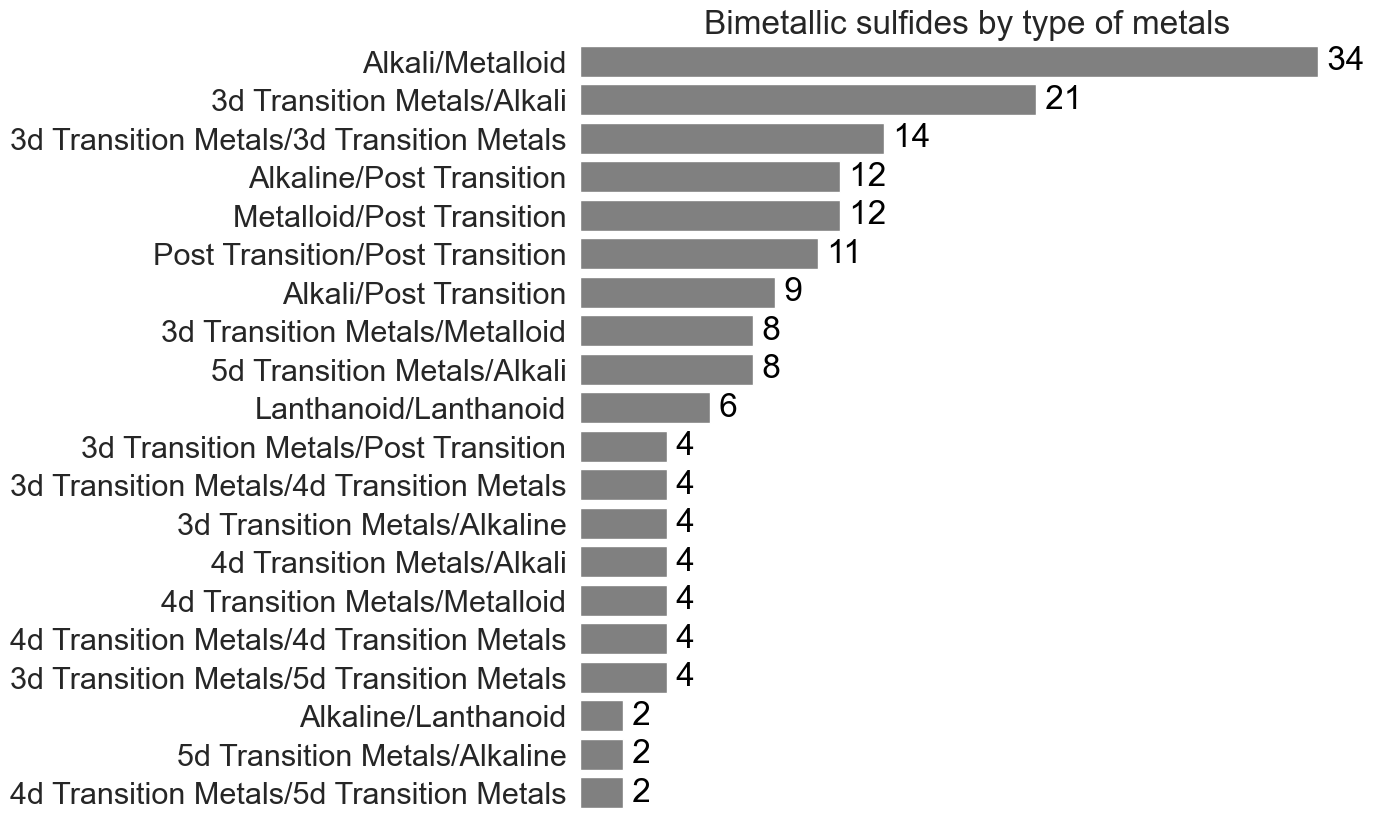

In [16]:
#filter from initial df for bimetallic sulfides those which form redox pair
#to further identify metals which form a pair
two_metals_forming_pairs = []
for material_pair in two_metal_reactions.keys():
    two_metals_forming_pairs.extend(two_metal_reactions[material_pair]['MP_id'])
two_metals_forming_pairs = set(two_metals_forming_pairs)
df_two_materials = pd.read_csv('two_metal_sulfides_MP_database.csv', index_col=0)
filtered_df_two_metals = df_two_materials[df_two_materials.index.isin(two_metals_forming_pairs)]

TM_3d = ['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn']
TM_4d = ['Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd']
TM_5d = ['Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg']

def get_metal_type(composition_str):
    metal_type_list = []

    elements = Composition(composition_str).elements
    for element in elements:
        if element.symbol == 'S':
            continue  # Skip 'S'
        # Check the metal type based on the element
        elif element.symbol in TM_3d:
            metal_type = '3d Transition Metals'
        elif element.symbol in TM_4d:
            metal_type = '4d Transition Metals'
        elif element.symbol in TM_5d:
            metal_type = '5d Transition Metals'
        elif element.is_alkali:
            metal_type = 'Alkali'
        elif element.is_alkaline:
            metal_type = 'Alkaline'
        elif element.is_post_transition_metal:
            metal_type = 'Post Transition'
        elif element.is_metalloid:
            metal_type = 'Metalloid'
        elif element.is_lanthanoid:
            metal_type = 'Lanthanoid'
        metal_type_list.append(metal_type)
        metal_type_list = sorted(metal_type_list)
    return metal_type_list

filtered_df_two_metals['Metal_Type'] = filtered_df_two_metals['pretty_formula'].apply(get_metal_type)
filtered_df_two_metals['Metal_Type_Str'] = filtered_df_two_metals['Metal_Type'].apply(lambda row: '/'.join(row))

counts = filtered_df_two_metals['Metal_Type_Str'].value_counts()

# Create a DataFrame with the metal types and their counts
count_df = counts.reset_index()
count_df.columns = ['Metal_Type_Str', 'Count']
count_df = count_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 10)) 
sns.set(font_scale=2)
colors = ['grey' if metal_type != 'Transition/Transition' else 'gold' for metal_type in count_df['Metal_Type_Str']]
sns.barplot(x='Count', y='Metal_Type_Str', data=count_df, palette=colors)
for index, value in enumerate(count_df['Count']):
    plt.text(value, index, f' {value}', va='center', ha='left', color='black')
plt.title('Bimetallic sulfides by type of metals')
plt.xticks([])
plt.xlabel('')
plt.ylabel('')
plt.box(False)

plt.show()

<h3>Limiting reaction analysis</h3>

for 0, number of viable pairs is 117, mean of dGrlim is 0.36563482871271497
II step    61
I step     56
Name: Limiting_reaction, dtype: int64
for 1, number of viable pairs is 157, mean of dGrlim is 0.3359141599966321
II step    80
I step     77
Name: Limiting_reaction, dtype: int64
for 2, number of viable pairs is 185, mean of dGrlim is 0.3104980505225112
II step    100
I step      85
Name: Limiting_reaction, dtype: int64


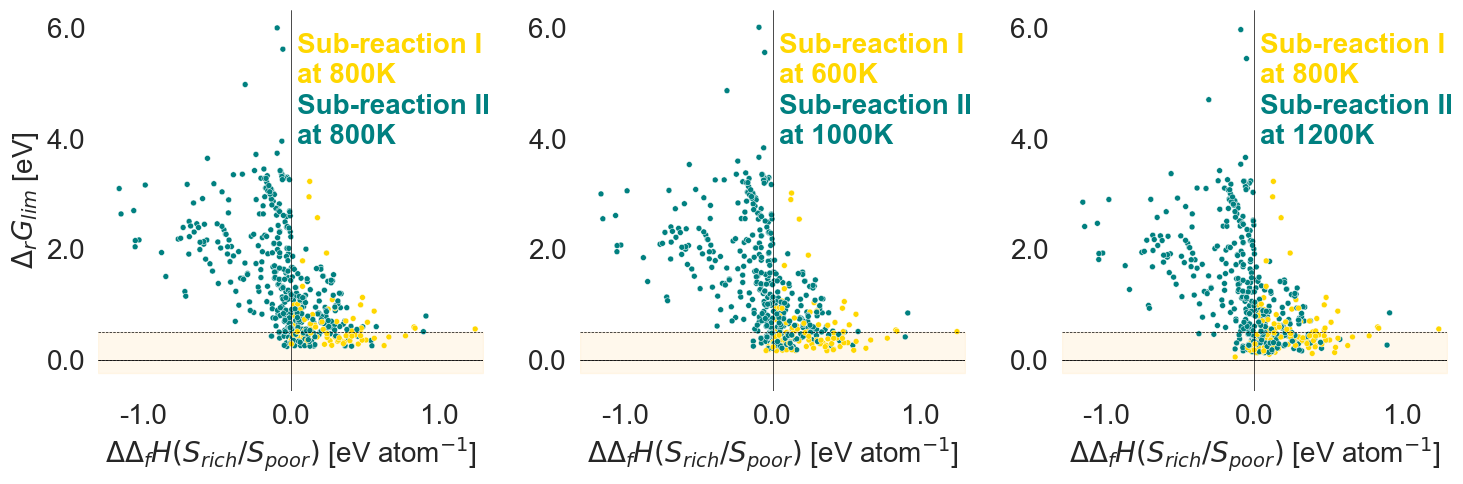

In [30]:
viable_pairs = [[], [], []]
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
color_I, color_II = 'gold', 'teal'

for i in range(3):
    data = []
    for material_pair in one_metal_reactions.keys():
        Hf_0_poor = one_metal_reactions[material_pair]['Hf_0K, eV/atom'][0]
        Hf_0_rich = one_metal_reactions[material_pair]['Hf_0K, eV/atom'][1] 
        if i == 0:
            concatenated_list = [one_metal_reactions[material_pair]['Gr_energy, eV'][0][4]] + [one_metal_reactions[material_pair]['Gr_energy, eV'][1][4]]
        elif i == 1:
            concatenated_list = [one_metal_reactions[material_pair]['Gr_energy, eV'][0][2]] + [one_metal_reactions[material_pair]['Gr_energy, eV'][1][6]]
        elif i == 2:
            concatenated_list = [one_metal_reactions[material_pair]['Gr_energy, eV'][0][4]] + [one_metal_reactions[material_pair]['Gr_energy, eV'][1][8]]
        
        dGr_lim = max(concatenated_list)
        max_index = concatenated_list.index(dGr_lim)
        threshold = 0.5
        if dGr_lim <= threshold:
            viable_pairs[i].append(material_pair)    
        dGr_lim = max(concatenated_list)
        max_index = concatenated_list.index(dGr_lim)

        if max_index == 0:
            source_list = "I step"
        else:
            source_list = "II step"

        data.append({'Limiting_reaction': source_list,
                     'Name': material_pair,
                     'delta_H': Hf_0_rich - Hf_0_poor, 
                     'dGr_lim': dGr_lim})

    for material_pair in two_metal_reactions.keys():
        Hf_0_poor = two_metal_reactions[material_pair]['Hf_0K, eV/atom'][0]
        Hf_0_rich = two_metal_reactions[material_pair]['Hf_0K, eV/atom'][1] 
        if i == 0:
            concatenated_list = [two_metal_reactions[material_pair]['Gr_energy, eV'][0][4]] + [two_metal_reactions[material_pair]['Gr_energy, eV'][1][4]]
        elif i == 1:
            concatenated_list = [two_metal_reactions[material_pair]['Gr_energy, eV'][0][2]] + [two_metal_reactions[material_pair]['Gr_energy, eV'][1][6]]
        elif i == 2:
            concatenated_list = [two_metal_reactions[material_pair]['Gr_energy, eV'][0][4]] + [two_metal_reactions[material_pair]['Gr_energy, eV'][1][8]]
        
    # Find the minimum value and its index
        dGr_lim = max(concatenated_list)
        max_index = concatenated_list.index(dGr_lim)
        threshold = 0.5
        if dGr_lim <= threshold:
            viable_pairs[i].append(material_pair)
            
        # Determine from which list the minimum value comes
        if max_index == 0:
            source_list = "I step"
        else:
            source_list = "II step"

        data.append({'Limiting_reaction': source_list,
                     'Name': material_pair,
                     'delta_H': Hf_0_rich - Hf_0_poor, 
                     'dGr_lim': dGr_lim})
        
    sns.set(style="white")
        
    df_dGr_lim = pd.DataFrame(data)
    if i == 0:
        df_800_800 = df_dGr_lim
    if i == 1:
        df_600_1000 = df_dGr_lim
    if i == 2:
        df_800_1200 = df_dGr_lim


    ax = plt.subplot(1,3,i+1)
    threshold_value = 0.5
    mean_value = df_dGr_lim[df_dGr_lim['dGr_lim'] < threshold_value]['dGr_lim'].mean()
    num_rows = df_dGr_lim[df_dGr_lim['dGr_lim'] < threshold_value].shape[0]
    print(f'for {i}, number of viable pairs is {num_rows}, mean of dGrlim is {mean_value}')
    print( df_dGr_lim[df_dGr_lim['dGr_lim'] < threshold_value]['Limiting_reaction'].value_counts())
    
    
    color_palette = {'I step': 'gold', 'II step': 'teal'}
    
    sns.scatterplot(data=df_dGr_lim, x='delta_H', y='dGr_lim', 
                    hue="Limiting_reaction", size=2, zorder=2, palette=color_palette, alpha=1)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    
    if i == 0:
        plt.text(0.04, 5, 'Sub-reaction I\nat 800K', fontsize=20, color=color_I, fontweight='bold')
        plt.text(0.04, 3.9, 'Sub-reaction II\nat 800K', fontsize=20, color=color_II, fontweight='bold')

    elif i == 1:
        plt.text(0.04, 5, 'Sub-reaction I\nat 600K', fontsize=20, color=color_I, fontweight='bold')
        plt.text(0.04, 3.9, 'Sub-reaction II\nat 1000K', fontsize=20, color=color_II, fontweight='bold')
    elif i == 2:
        plt.text(0.04, 5, 'Sub-reaction I\nat 800K', fontsize=20, color=color_I, fontweight='bold')
        plt.text(0.04, 3.9, 'Sub-reaction II\nat 1200K', fontsize=20, color=color_II, fontweight='bold')  #     plt.text(0.04, 5, 'sulfurization', fontsize=20, color='C0', fontweight='bold')

    plt.axvline(0, color='black', linestyle='-', linewidth=0.5) 



    plt.xlabel(r'${\Delta\Delta}_f\it{H (S _{rich}/S _{poor})}$ [eV atom$^{-1}$]',
              fontsize=20)
    plt.ylabel(r'${\Delta}_r\it{G}_\mathrm{\mathit{lim}}$ [eV]', fontsize=20)
    plt.axhline(0.5, color='black', linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5)

    ax.legend().set_visible(False)
    xlim, ylim = 1.3, -0.25    
    ax.tick_params(which='major', labelsize=20,labelleft=True,
               labelbottom=True)

    plt.xlim(-xlim, xlim)
    plt.fill_betweenx([ylim, threshold_value], xlim, -xlim, color='moccasin', alpha=0.25, zorder=1)
    plt.box(False)

fig.tight_layout()
plt.show()



In [21]:
sorted_df_pressure = df_800_800.sort_values(by='dGr_lim')
sorted_df_pressure.to_csv('limiting_800_800.csv')

sorted_df = df_600_1000.sort_values(by='dGr_lim')
sorted_df.to_csv('limiting_600_1000.csv')

sorted_df = df_800_1200.sort_values(by='dGr_lim')
sorted_df.to_csv('limiting_800_1200.csv')


<h3>Introducing pressure to the system</h3>

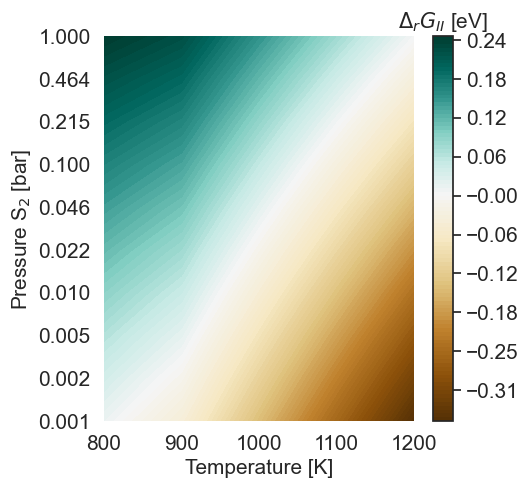

In [22]:

def Gr_pressure_IIstep(Gr0_array, p_S2=1):
    Gr_pressure = [G + 8.314 * T / 96485 * np.log((p_S2) ** (1/2)) for G, T in zip(Gr0_array, temp_list)]
    return Gr_pressure

temp_list = list(range(400, 1300, 100))
p_S2_array = np.logspace(0, -3, 10)
Gr_all = []
for_pressure_heatmap = sorted_df_pressure[sorted_df_pressure['Limiting_reaction'] == 'II step'][:10]['Name'].tolist()
for material_pair in for_pressure_heatmap:
    one_or_two = len(Composition(material_pair.split('/')[0]).elements)
    if one_or_two == 2:
        Gr_all.append([Gr_pressure_IIstep(one_metal_reactions[material_pair]['Gr_energy, eV'][1], 
                                          p_S2=p_S2) for p_S2 in p_S2_array])
    if one_or_two == 3:
        Gr_all.append([Gr_pressure_IIstep(two_metal_reactions[material_pair]['Gr_energy, eV'][1], 
                                          p_S2=p_S2) for p_S2 in p_S2_array])
arr = np.array(Gr_all)

# Transpose the array
Gr_means = np.mean(np.array(arr), axis=0)  # Calculate mean along axis 1 (temperature axis)
Gr_means_excluded = Gr_means[:, 4:]
fig = plt.figure(figsize=(5, 5))  # Adjust size as needed
cmap = 'BrBG'  # Example colormap
midpoint = 0  # Value to be mapped to the middle of the colormap

# Create a TwoSlopeNorm with the desired midpoint
norm = mcolors.TwoSlopeNorm(vmin=Gr_means_excluded.min(), vcenter=midpoint, vmax=Gr_means_excluded.max())
levels = np.linspace(np.min(Gr_means_excluded), np.max(Gr_means_excluded), 100)  # Adjust the number of levels as needed

heatmap = plt.contourf(Gr_means_excluded, cmap=cmap, norm=norm, 
                       levels=levels)

cbar = plt.colorbar(heatmap, format='%.2f')
cbar.ax.set_title(r'${\Delta}_rG_{II}$ [eV]', fontsize=15)

ticks = cbar.get_ticks()

labels = [f'{tick:.2f}' if tick >= 0 else f'−{abs(tick):.2f}' for tick in ticks]  # Replace minus sign with dash

cbar.set_ticks(ticks)
cbar.set_ticklabels(labels)
cbar.ax.tick_params(labelsize=15)
plt.gca().invert_yaxis()
plt.xlabel('Temperature [K]', fontsize=15)
plt.ylabel(r'Pressure S$_2$ [bar]', fontsize=15)
plt.xticks(np.arange(len(temp_list[4:])), temp_list[4:], fontsize=15)
plt.yticks(np.arange(len(p_S2_array)), ['{:.3f}'.format(val) for val in p_S2_array], fontsize=15)  # Format tick labels to scientific notation with two decimal places

# Show the plot
plt.box(False)
plt.show()

<h3>Mendeleev tables of elements occurence in viable pairs</h3>

In [27]:
# Function to extract elements from formula
def extract_elements(formula):
    formula_str = formula.split('/')[0] 
    elements = Composition(formula_str).elements
    return elements

for i in range(3):
    # Apply the function to create a new column 'Elements'
    list_of_elements = [extract_elements(formula) for formula in viable_pairs[i] if len(Composition(formula.split('/')[0]).elements) == 2]

    # Flatten the list of elements and create a frequency table
    elements_freq = [element.name for sublist in list_of_elements for element in sublist]
    frequency_table = pd.Series(elements_freq).value_counts().reset_index()
    frequency_table.columns = ['Element', 'Frequency']
    frequency_table = frequency_table[frequency_table['Element'] != 'S']
    frequency_dict = frequency_table.set_index('Element')['Frequency'].to_dict()

    df = pd.DataFrame(frequency_dict.items()) 
    
    #add a row H, 13 to unify the colorbar among all tables
    new_row = pd.Series(['H', 13], index=df.columns)
    df = df.append(new_row, ignore_index=True)
    # Save DataFrame as CSV
    df.to_csv(f'freq_{i}.csv', index=False, header=False)

    plotter(f"freq_{i}.csv",
            cmap="cividis", 
            periods_remove=[1,7],
            groups_remove=[16,17,18],
            blank_color = 'white',
            cbar_fontsize = 30, 
            width = 750, 
           )


/var/folders/66/8zx0tncn3gs_xhq4jl2nn7lrrs3zm3/T/ipykernel_84541/4185009655.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/var/folders/66/8zx0tncn3gs_xhq4jl2nn7lrrs3zm3/T/ipykernel_84541/4185009655.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/var/folders/66/8zx0tncn3gs_xhq4jl2nn7lrrs3zm3/T/ipykernel_84541/4185009655.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


<h3>Benchmarking with experimental JANAF-NIST Gr values</h3>

In [24]:
x = np.array(range(400, 1300, 100))
x = np.insert(x, 0, 0)
NiS_Ni3S2 = [0.317561936,
0.341582244,
0.348041775,
0.340911692,
0.318792449,
0.359052745,
0.462341764,
0.515429662,
0.569356202,
0.623116178]
FeS_FeS2 = [0.34576615,
0.417530828,
0.46080328,
0.512188988,
0.568028956,
0.625140523,
0.682773693,
0.739912942,
0.796439853,
0.852219741  
]
Mo2S3_MoS2 = [None,
              0.541771595,
0.574536715,
0.610512751,
0.648155067,
0.686706242,
0.72611066,
0.765705207,
0.805651275,
0.845897161
]

NiS_Ni3S4 = [None,
             0.576108212,
0.581056838,
0.586355699,
0.603965021,
0.632754211,
0.656219495,
0.673562907,
0.684801041, None]
Ni3S4_NiS2 = [None,
               0.038870756,
0.014701799,
0.013735243,
0.045263655,
0.079405836,
0.11621503,
0.155157654,
0.196436568, None]

Ni3S2_Ni3S4 = [
    None,
    0.451460658,
0.455801766,
0.461415691,
0.466187715,
0.468935488,
0.494679874,
0.52895246,
0.561058016 ,
    None
]
Ni3S2_NiS2 = [
    None, 
    0.206294956,
0.220549984,
0.237575467,
0.25572568,
0.274170662,
0.305447457,
0.342055062,
0.378747297,
0.41522118]

NiS_NiS2 = [None,
    0.166122237,
0.183884417,
0.204608732,
0.231497437,
0.263855301,
0.296216518,
0.327959405,
0.359224733,
0.389971148   
]

MAE = [331.664043,
342.4676855,
354.9220718,
370.9130328,
392.2019974,
423.7526259,
467.5005615,
506.0919123,
543.9643732,
625.2850815    
]
Lines = [NiS_Ni3S2, FeS_FeS2, Mo2S3_MoS2, NiS_Ni3S4, Ni3S4_NiS2, 
        Ni3S2_Ni3S4,Ni3S2_NiS2, NiS_NiS2]

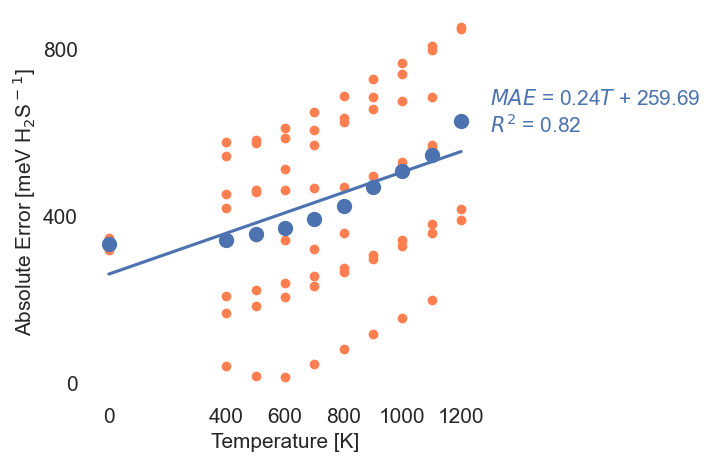

In [25]:
fig=plt.figure(figsize=(5,5))
for line in Lines:
    lst = list(map(lambda x: x * 1000 if x is not None else None, line))
    plt.scatter(x, lst, color='coral')
plt.scatter(x, MAE, s=100)
sns.regplot(x=x, y=MAE, ci=None)
slope, intercept, r_value, p_value, std_err = linregress(x, MAE)

# Calculate R-squared value
r_squared = r_value**2
plt.tick_params(which='major', labelsize=15)
plt.yticks([0,400,800])
plt.xticks([0,400,600, 800, 1000, 1200])

MAE_it = r'$\it{MAE}$'
T_it = r'$\it{T}$'
R2_it = r'$\it{R^2}$'
# Add labels and title
plt.xlabel('Temperature [K]', fontsize=15)
plt.ylabel(r'Absolute Error [meV H$_2$S$^-$$^1$]', fontsize=15)
plt.text(1300, 600, f"""{MAE_it} = {slope:.2f}{T_it} + {intercept:.2f}
{R2_it} = {r_squared:.2f}""", color='C0',  fontsize=15)
plt.box(False)
plt.show()